# Project: Investigate a Dataset - TMDB-Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Below provided dataset contains around 10k rows from TMDB movies. Dataset have several numerical like budget, revenue etc. & structural columns like title of movie, cast, director etc.

[Dataset source](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf)

## Questions to be answered
    1. Is budget of movie proportional somehow to popularity or revenue?
    2. What is economical statistics of movies?

In [28]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [29]:
pd.__version__

'2.2.2'

In [30]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0
# pip install Jinja2

<a id='wrangling'></a>
## Data Wrangling

In [31]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_raw = pd.read_csv('tmdb-movies.csv')
df = df_raw.copy()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
 

In [32]:
# understanding the number of columns & rows in dataset
df.shape

(10866, 21)

In [33]:
# overall view of column, their datatypes and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [34]:
# statistical analysis of overall dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


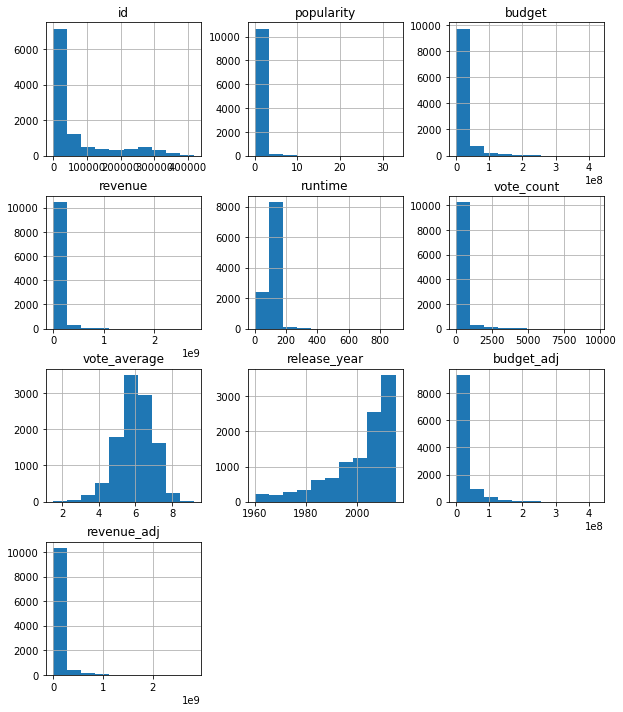

In [35]:
# getting idea of distribution of features and their relevance
df.hist(figsize=(10,12));

#### id & imdb_id - these must be identifiers and wont make much difference even if deleted
#### tagline, keywords, production_companies & homepage - these features have lots of null data with text as data

In [36]:
cols_to_be_deleted = ["homepage", "id", "imdb_id", "tagline", "keywords", "overview", "production_companies"]
df.drop(columns=cols_to_be_deleted, axis=1, inplace=True)

In [37]:
# replace all text columns with 'UNKNOWN'
df[['cast', 'director', 'genres']]=df[['cast', 'director', 'genres']].fillna('UNKNOWN')

In [38]:
# verifying the dataset after changes being made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10866 non-null  object 
 5   director        10866 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10866 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [39]:
# converting release year from int to datetime
df['release_year']=pd.to_datetime(df.release_year)

In [40]:
df.release_year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10866 entries, 0 to 10865
Series name: release_year
Non-Null Count  Dtype         
--------------  -----         
10866 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.0 KB


In [41]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,1970-01-01 00:00:00.000002001,1.755104e+07,5.136436e+07
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1970-01-01 00:00:00.000001960,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1970-01-01 00:00:00.000001995,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,1970-01-01 00:00:00.000002006,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,1970-01-01 00:00:00.000002011,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,1970-01-01 00:00:00.000002015,4.250000e+08,2.827124e+09
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,NaN,3.430616e+07,1.446325e+08


In [42]:
# Looking at the above statistics, it appears the min value for budget, revenue, runtime starts from 0 
# which does not make sense, lets eliminate these rows for better analysis
df[['budget', 'revenue', 'runtime']] = df[['budget', 'revenue', 'runtime']].replace(0, np.NAN)
df.dropna(axis=0, inplace=True)

In [43]:
# verify the changes
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855,3.855000e+03,3.855000e+03
mean,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,1970-01-01 00:00:00.000002001,4.423630e+07,1.370294e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1970-01-01 00:00:00.000001960,9.693980e-01,2.370705e+00
25%,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1970-01-01 00:00:00.000001995,1.309053e+07,1.834123e+07
50%,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,1970-01-01 00:00:00.000002004,3.001558e+07,6.171861e+07
75%,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,1970-01-01 00:00:00.000002010,6.061307e+07,1.632401e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,1970-01-01 00:00:00.000002015,4.250000e+08,2.827124e+09
std,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,NaN,4.480403e+07,2.160944e+08


<a id='eda'></a>
## Exploratory Data Analysis


### Is budget of movie proportional somehow to popularity or revenue?

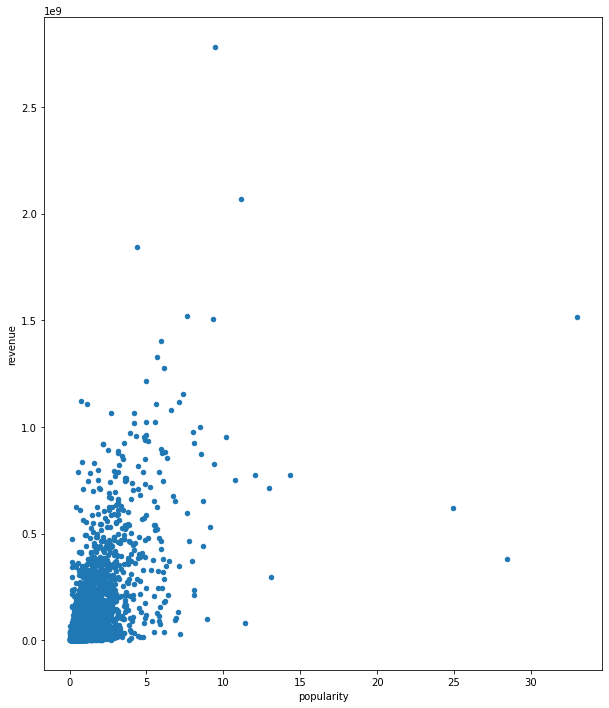

In [44]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.plot(x='popularity', y='revenue',kind='scatter', figsize=(10,12));

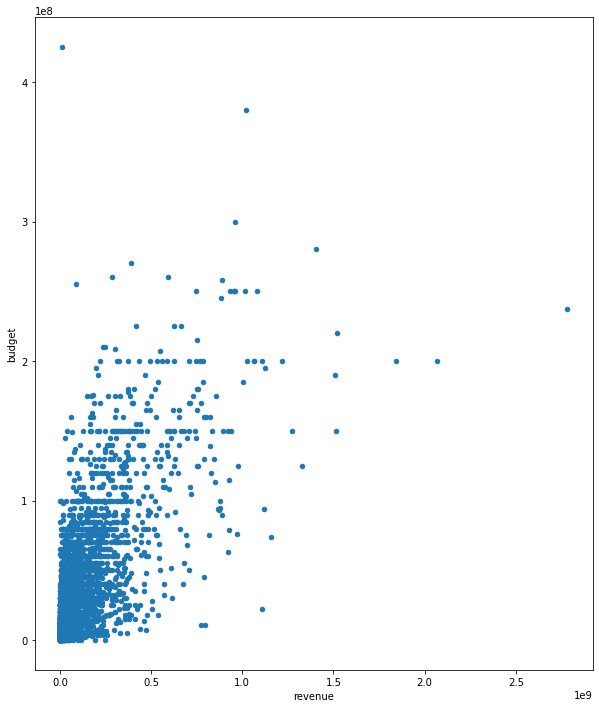

In [45]:
df.plot(x='revenue', y='budget',kind='scatter', figsize=(10,12));

In [46]:
# lets check the relation of profit_made with popularity 
df['profit_made'] = df['revenue'] - df['budget']

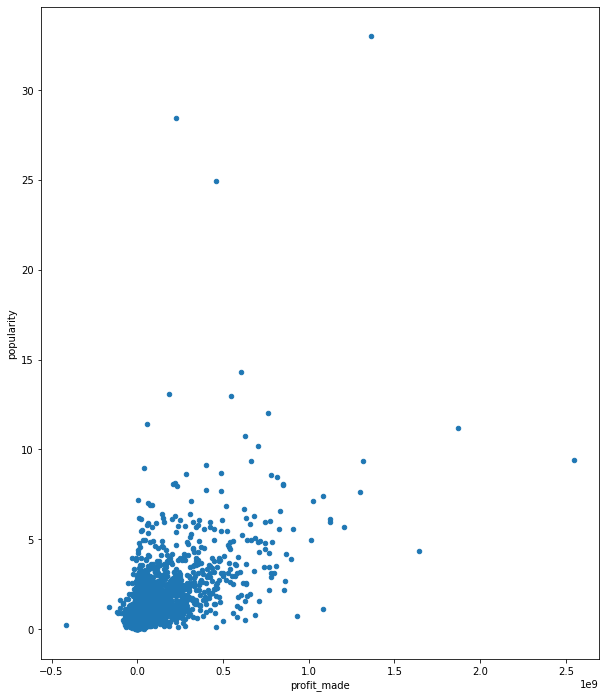

In [47]:
df.plot(x='profit_made', y='popularity',kind='scatter', figsize=(10,12));

### Ans: Seems like profit made column has positive corelation with popularity which means popular movies are tend to make more profits

### What is economical statistics of movies?

#### Which movie made biggest loss?

In [48]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df[df.profit_made == df.profit_made.min()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_made
2244,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,12/2/10,74,6.4,1970-01-01 00:00:00.000002010,425000000.0,11087569.0,-413912431.0


#### Which movie made largest profit?

In [49]:
df[df.profit_made == df.profit_made.max()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_made
1386,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,1970-01-01 00:00:00.000002009,2.408869e+08,2.827124e+09,2.544506e+09


#### How did movie profits & budget vary over time?

Text(0.5, 0, 'Years')

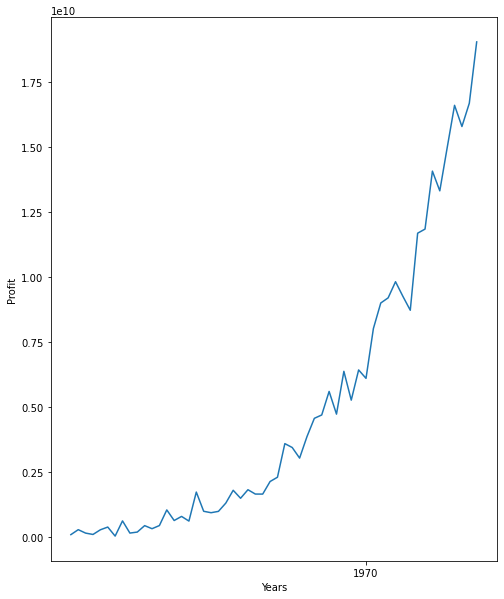

In [50]:
yearly_net_profit = df.groupby('release_year')['profit_made'].sum()
plt.figure(figsize=(8,10))
plt.plot(yearly_net_profit)
plt.ylabel("Profit", fontsize=10)
plt.xlabel("Years", fontsize=10)

### Seems like there is an upward trend on making profits yearly

Text(0.5, 0, 'Year')

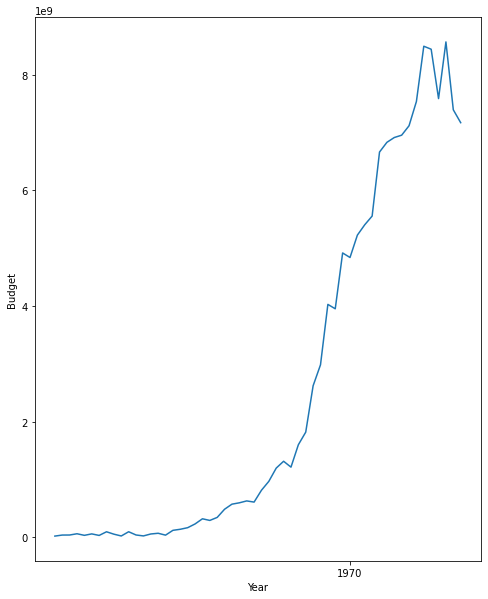

In [51]:
yearly_net_profit = df.groupby('release_year')['budget'].sum()
plt.figure(figsize=(8,10))
plt.plot(yearly_net_profit)
plt.ylabel("Budget", fontsize=10)
plt.xlabel("Year", fontsize=10)

<a id='conclusions'></a>
## Conclusions

* We can say the popularity of movies is proportional to the revenue
* Also popular movies made good profit
* Avatar by James Cameron outperformed & records highest of overall profit made. However, The Warriors' Way underperformed
* As popularity of movies increased yearly so we can see the allocation of budget is also increased

### Limitations
The numeric features such as revenue & budget is not provided clearly their location and currency so I assumed it is in € (Euro) but it can differ depending on the location.

In [52]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', '--to', 'html' ,'Investigate_a_Dataset.ipynb'])